In [7]:
import pandas as pd
import os

df_download = pd.read_csv(os.path.join('data', 'merged_download.csv'))

<Axes: title={'center': 'Mean download speed'}, xlabel='operator'>

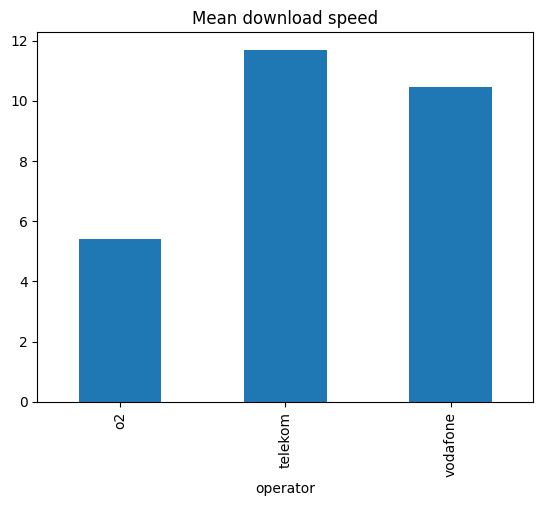

In [8]:
df_download['speed'].groupby(df_download['operator']).mean().plot(kind='bar', title='Mean download speed')

<Axes: title={'center': 'Median download speed'}, xlabel='operator'>

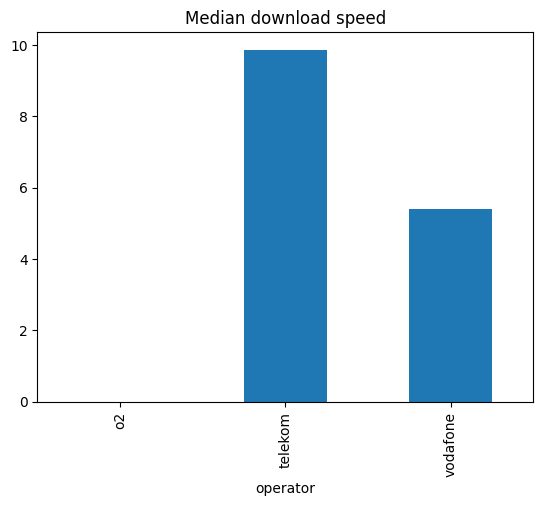

In [9]:
df_download['speed'].groupby(df_download['operator']).median().plot(kind='bar', title='Median download speed')

<Axes: title={'center': 'Std download speed'}, xlabel='operator'>

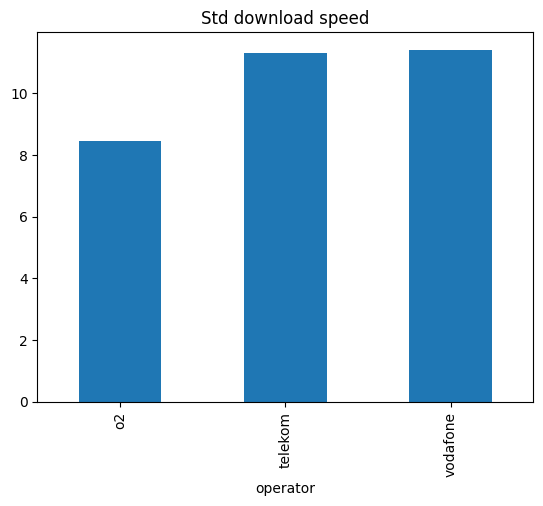

In [10]:
df_download['speed'].groupby(df_download['operator']).std().plot(kind='bar', title='Std download speed')

In [11]:
df_download['date'] = pd.to_datetime(df_download['qualitytimestamp'], unit='s')
df_download['date'] = pd.to_datetime(df_download['date'], format='%Y-%m-%d %H')


KeyError: 'qualitytimestamp'

In [ ]:
df_download.describe()

In [ ]:
df_download[df_download['operator'] == 'o2'].plot.scatter(x='date', y='speed', rot=60)


In [ ]:
df_download[df_download['operator'] == 'telekom'].plot.scatter(x='date', y='speed', rot=60)

In [ ]:
df_download[df_download['operator'] == 'vodafone'].plot.scatter(x='date', y='speed', rot=60)

In [ ]:
import matplotlib.pyplot as plt

df_download[df_download['operator'] == 'o2'].plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             label='population', figsize=(10,7),
             c='speed', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

In [ ]:
df_download['time'] = df_download['date'].dt.hour

In [ ]:
import seaborn as sns
import numpy as np
# Correlation matrix
corrmat = df_download.corr()

# Saleprice correlation matrix
k = 10 # numbers of variables in heatmap
cols = corrmat.nlargest(k, 'speed')['speed'].index
print(cols)
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df_download[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)